<a href="https://colab.research.google.com/github/akaver/NLP2019/blob/master/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word embeddings

First, we will look how to use pretrained word embeddings. We use word embeddings computed for Estonian *lemmas*, that is, word is lemmatized (using EstNLTK) before training is performed (using word2vec toolkit).

We will download the pretrained mebeddings from Tartu University web site.

In [0]:
!wget http://ats.cs.ut.ee/keeletehnoloogia/estnltk/word2vec/lemmas.sg.s100.w2v.bin.gz

--2019-03-19 11:12:37--  http://ats.cs.ut.ee/keeletehnoloogia/estnltk/word2vec/lemmas.sg.s100.w2v.bin.gz
Resolving ats.cs.ut.ee (ats.cs.ut.ee)... 193.40.36.55, 193.40.36.57
Connecting to ats.cs.ut.ee (ats.cs.ut.ee)|193.40.36.55|:80... failed: Connection timed out.
Connecting to ats.cs.ut.ee (ats.cs.ut.ee)|193.40.36.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168965300 (161M) [application/x-gzip]
Saving to: ‘lemmas.sg.s100.w2v.bin.gz’

lemmas.sg.s100.w2v. 100%[===================>] 161.14M  7.19MB/s    in 19s     

2019-03-19 11:15:08 (8.30 MB/s) - ‘lemmas.sg.s100.w2v.bin.gz’ saved [168965300/168965300]



In [0]:
!gunzip lemmas.sg.s100.w2v.bin.gz

gzip: lemmas.sg.s100.w2v.bin already exists; do you wish to overwrite (y or n)? y


Next, we will install the `gensim` Python package. Gensim is useful for working with embeddings, training embeddings, topic modeling, and many other tasks related to text semantics.

In [0]:
!pip3 install gensim

We will now load the pretrained embeddings using Gensim.

In [0]:
import gensim
from gensim.models import KeyedVectors

In [0]:
wv =  KeyedVectors.load_word2vec_format("lemmas.sg.s100.w2v.bin", binary=True)

It is easy to find words that have most similar vectors to a word:

In [0]:
 wv.most_similar("arvuti")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kõvaketas', 0.8456020355224609),
 ('koduarvuti', 0.8447602987289429),
 ('lauaarvuti', 0.8266680240631104),
 ('sülearvuti', 0.8263174295425415),
 ('kontoriarvuti', 0.8158494234085083),
 ('raadiokaart', 0.8081041574478149),
 ('arvutis', 0.8049970269203186),
 ('laptopp', 0.8048467636108398),
 ('riistvara', 0.8041128516197205),
 ('tarkvara', 0.8034973740577698)]

Remember that those embeddings are availabe only for lemmas, so you cannot find similar words to words like "arvutile".

Gensim also allows to specify "positive words" and "negative words" when computing similarity. This allows us to find whether there are some biases in our word vectors, as covered in the lecture:

In [0]:
 wv.most_similar(positive=['kaabu', 'naine'], negative=['mees'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kleit', 0.8228166699409485),
 ('mantel', 0.8165278434753418),
 ('seelik', 0.8044856190681458),
 ('miniseelik', 0.7953897714614868),
 ('pluus', 0.7906196117401123),
 ('õlgkübar', 0.7902539372444153),
 ('mütsike', 0.7874605655670166),
 ('tikk-konts', 0.7821874618530273),
 ('hommikumantel', 0.7818199992179871),
 ('parukas', 0.7811592817306519)]

So, maybe 'sisearhitekt' is the female equivalent of 'arhitekt'?  Let's also try whether the famous `queen = king - man + woman` example works with Estonian lemmas:

In [0]:
 wv.most_similar(positive=['kuningas', 'naine'], negative=['mees'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kuninganna', 0.8504600524902344),
 ('prints', 0.7523321509361267),
 ('monarh', 0.7449131608009338),
 ('kroonprints', 0.7391809821128845),
 ('haakon|haakoni', 0.7388002276420593),
 ('krahvinna', 0.7360948324203491),
 ('printsess', 0.7353565692901611),
 ('aishwarya', 0.7319592237472534),
 ('heroodes', 0.730731189250946),
 ('haakon', 0.7300544381141663)]

It's interesting to play with lemmas:

In [0]:
wv.most_similar(positive=['helsinki', 'prantsusmaa'], negative=['soome'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('montpellier', 0.7420971989631653),
 ('pariis', 0.7152196764945984),
 ('saint-etienne', 0.7123215198516846),
 ('antverpen', 0.7113099098205566),
 ('dublin', 0.7105499505996704),
 ('saint-germain', 0.7081636786460876),
 ('salamanca', 0.6966378092765808),
 ('lyon', 0.6964538097381592),
 ('montevideo', 0.6919864416122437),
 ('saint-denis', 0.6916863322257996)]

It's also easy to create a clustering tree (dendrogram) for a bunch of words. For example, let's try with placenames.

In [0]:
words = "kuressaare orissaare kärdla tallinn tartu narva jõgeva võru valga riia helsinki stockholm moskva kiiev pariis".split()

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

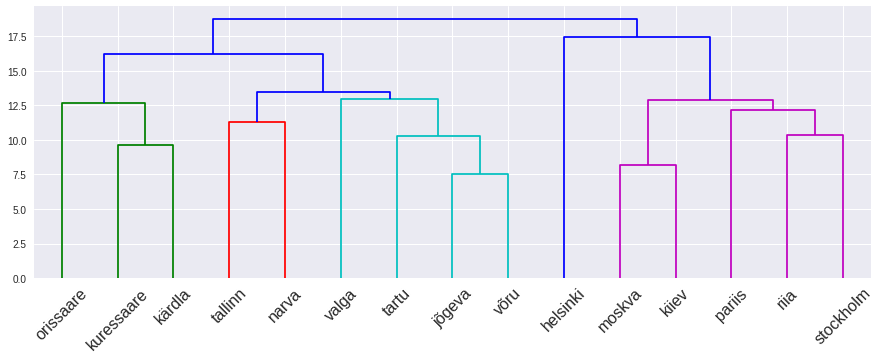

In [0]:
l = linkage([wv[w] for w in words], method='complete', metric='seuclidean')
plt.figure(figsize=(15, 5))


dendrogram(
    l,
    leaf_rotation=45.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='top',
    leaf_label_func=lambda v: str(words[v])
)
plt.show()

Let's also experiment with English pretrained word embeddings.

In [0]:
!wget --no-check-certificate https://phon.ioc.ee/~tanela/tmp/glove.6B.50d.w2vformat.txt.gz

--2019-03-19 11:18:33--  https://phon.ioc.ee/~tanela/tmp/glove.6B.50d.w2vformat.txt.gz
Resolving phon.ioc.ee (phon.ioc.ee)... 193.40.251.126
Connecting to phon.ioc.ee (phon.ioc.ee)|193.40.251.126|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 69182535 (66M) [application/x-gzip]
Saving to: ‘glove.6B.50d.w2vformat.txt.gz’

glove.6B.50d.w2vfor 100%[===================>]  65.98M  9.44MB/s    in 25s     

2019-03-19 11:18:58 (2.68 MB/s) - ‘glove.6B.50d.w2vformat.txt.gz’ saved [69182535/69182535]



In [0]:
!gunzip glove.6B.50d.w2vformat.txt.gz

In [0]:
wv_en =  KeyedVectors.load_word2vec_format("glove.6B.50d.w2vformat.txt", binary=False)

In [0]:
wv_en.most_similar(positive=['estonia', 'helsinki'], negative=['finland'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tallinn', 0.8663182258605957),
 ('riga', 0.8012927174568176),
 ('vilnius', 0.8002323508262634),
 ('budapest', 0.7893616557121277),
 ('prague', 0.7761988043785095),
 ('bratislava', 0.766411304473877),
 ('skopje', 0.7501643300056458),
 ('ljubljana', 0.7443312406539917),
 ('minsk', 0.7439618706703186),
 ('bucharest', 0.7199530601501465)]

In [0]:
words_en = "estonia latvia lithuania france poland italy finland sweden thailand canada norway".split()

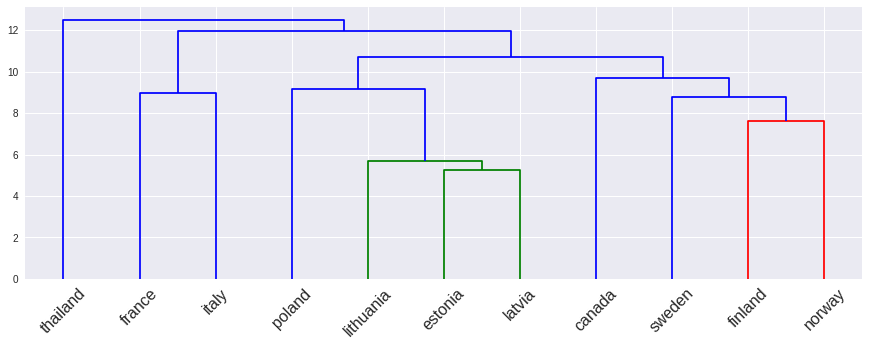

In [0]:
l = linkage([wv_en[w] for w in words_en], method='complete', metric='seuclidean')
plt.figure(figsize=(15, 5))


dendrogram(
    l,
    leaf_rotation=45.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='top',
    leaf_label_func=lambda v: str(words_en[v])
)
plt.show()